# Test the best performing model on new data

The model is found on the drive link below

In [29]:
import sys
sys.path.append('./../')
!{sys.executable} -m pip install gdown h5py

## Load the Data

In [ ]:
from utils import load_it_data, visualize_img
import matplotlib.pyplot as plt
import numpy as np
import gdown
import torch
from torch.utils.data import TensorDataset, DataLoader

url = "https://drive.google.com/file/d/1s6caFNRpyR9m7ZM6XEv_e8mcXT3_PnHS/view?usp=share_link"
url_for_model_pth = "https://drive.google.com/file/d/1juTYaYtclApJXCJoHm278LF3fLVjl-W-/view?usp=sharing"
output = "IT_data.h5"
output_for_model = "hybrid_model_full_neurons.pth"
gdown.download(url, output, quiet=False, fuzzy=True)
gdown.download(url_for_model_pth, output_for_model, quiet=False, fuzzy=True)
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
path_to_data = '.' ## Insert the folder where the data is, if you download in the same folder as this notebook then leave it blank

stimulus_train, stimulus_val, stimulus_test, objects_train, objects_val, objects_test, spikes_train, spikes_val = load_it_data(path_to_data)

### How to use:

Suppose your data is stimulus_val (or stimulus_test). YOu also have a model `hybrid_model_full_neurons.pth`, which can be also obtained by running the `week8` part of the notebook if it is not downloading. Then, just run the following below:

You get the predictions, and then the metrics, which you can compare with your ground truth (suppose it is called ```spikes_val```)

In [ ]:
from test_predictions import predict_stimulus

preds = predict_stimulus(stimulus_val, "hybrid_model_full_neurons.pth",batch_size=len(stimulus_val), out_dim = 168)


Correlation Coefficients:  0.6976877
Explained Variance:  0.5014946
Mean Squared Error:  0.23990297


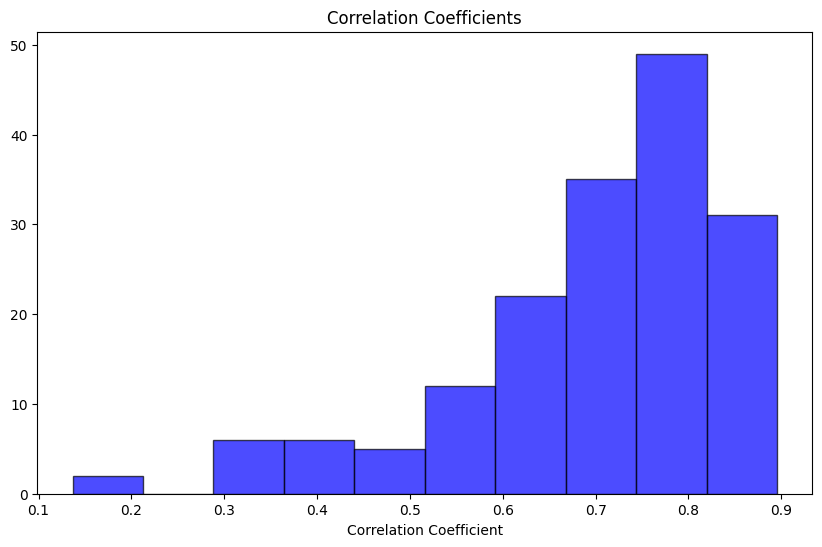

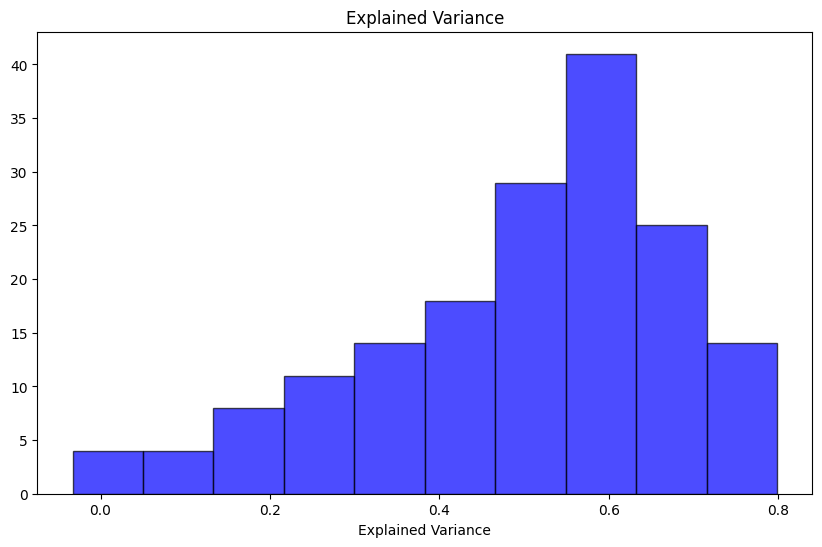

In [ ]:
# calculate correlation adn EV of the predictions

from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from scipy.stats import pearsonr

def compute_metrics(y_true, y_pred):

    # Explained Variance, this is how we will judge the model against other models
    ev = explained_variance_score(y_true, y_pred, multioutput='raw_values')
    mean_ev = np.mean(ev)

    # Pearson Correlation (per neuron)
    correlations = []
    for i in range(y_true.shape[1]):
        try:
            corr = pearsonr(y_true[:, i], y_pred[:, i])[0]
            correlations.append(corr)
        except:
            correlations.append(np.nan)
    mean_corr = np.nanmean(correlations)
    rmse = np.sqrt(((y_pred - y_true) ** 2).mean())

    return mean_ev, mean_corr, ev, correlations, rmse

mean_ev, mean_corr, ev, corr, rmse = compute_metrics(spikes_val, preds)
print("Correlation Coefficients: ", mean_corr)
print("Explained Variance: ", mean_ev)
print("Mean Squared Error: ", rmse)

plt.figure(figsize=(10,6))
plt.hist(corr, bins=10, alpha=0.7, color = 'blue', edgecolor='black')
plt.title('Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.show()
plt.figure(figsize=(10,6))
plt.hist(ev, bins=10, alpha=0.7, color = 'blue', edgecolor='black')
plt.title('Explained Variance')
plt.xlabel('Explained Variance')
plt.show()